# ITS307 Data Analytics                                                   : Spring Semester 2022
# Practical 6
# Regularization
![image.png](attachment:image.png)

# 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib as plt 
import numpy as np
from sklearn import datasets

In [2]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

# 2. Load Data

In [3]:
df = pd.DataFrame(data=boston.data,columns=boston.feature_names)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [4]:
X = boston.data
y = boston.target

# 3. Train test split

In [5]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3)

# 4. Simple Linear Model

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain, ytrain)

LinearRegression()

In [7]:
lr.score(xtrain, ytrain)

0.7261104950757911

In [8]:
lr.score(xtest, ytest)

0.7668343373009523

# 5. Ridge Regularization for Linear Model

In [9]:
from sklearn.linear_model import Ridge
modelr = Ridge(alpha=100)
modelr.fit(xtrain,ytrain)
modelr.score(xtrain,ytrain)

0.7041054145250032

In [10]:
modelr.score(xtest, ytest)

0.7226801650445125

# 6. Lasso Regularization for Linear Model

In [11]:
from sklearn.linear_model import Lasso
model3 = Lasso(alpha=0.1)
model3.fit(xtrain, ytrain)
Lasso(alpha=0.1)

Lasso(alpha=0.1)

In [12]:
model3.score(xtrain, ytrain)

0.7142772192952453

In [13]:
model3.score(xtest, ytest)

0.7388321427203636

# 7. Polynomial Regression of degree 2

In [14]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
xtrain_poly = pf.fit_transform(xtrain)
xtest_poly=pf.fit_transform(xtest)

In [15]:
lr.fit(xtrain_poly, ytrain)
lr.score(xtrain_poly, ytrain)

0.9344111191621473

In [16]:
lr.score(xtest_poly, ytest)

0.8396768746308629

# 8. Ridge Regularization for Polynomial model

In [17]:
modelrp = Ridge(alpha=10000000)
modelrp.fit(xtrain_poly,ytrain)
modelrp.score(xtrain_poly, ytrain)

0.7641643197985897

In [18]:
modelrp.score(xtest_poly, ytest)

0.7488415595620415

# 9. Lasso Regularization for Polynomial model

In [19]:
model3 = Lasso(alpha=0.6)
model3.fit(xtrain_poly, ytrain)
model3.score(xtrain_poly, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.884e+03, tolerance: 3.020e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.8911110334084177

In [20]:
model3.score(xtest_poly, ytest)

0.8320052941889763

# 10. Select K Best

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
kb = SelectKBest (score_func = f_regression, k=7)
x_selected= kb.fit_transform(xtrain, ytrain)
x_selected[0]

array([5.188e-02, 4.490e+00, 4.490e-01, 6.015e+00, 2.470e+02, 1.850e+01,
       1.286e+01])

In [22]:
 model1 = LinearRegression()
 model1.fit(x_selected, ytrain)
 LinearRegression()

LinearRegression()

In [23]:
model1.score(x_selected, ytrain)

0.6743469314729789

In [24]:
tdf = pd.DataFrame(data = xtrain, columns = boston.feature_names)
tdf.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.05188   0.0   4.49   0.0  0.449  6.015  45.1  4.4272  3.0  247.0   
1  0.05780   0.0   2.46   0.0  0.488  6.980  58.4  2.8290  3.0  193.0   
2  0.03738   0.0   5.19   0.0  0.515  6.310  38.5  6.4584  5.0  224.0   
3  0.01360  75.0   4.00   0.0  0.410  5.888  47.6  7.3197  3.0  469.0   
4  0.41238   0.0   6.20   0.0  0.504  7.163  79.9  3.2157  8.0  307.0   

   PTRATIO       B  LSTAT  
0     18.5  395.99  12.86  
1     17.8  396.90   5.04  
2     20.2  389.40   6.75  
3     21.1  396.90  14.80  
4     17.4  372.08   6.36

In [25]:
traindf = pd.DataFrame(data = xtrain, columns = boston.feature_names)
traindf['target'] = ytrain
traindf.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.05188   0.0   4.49   0.0  0.449  6.015  45.1  4.4272  3.0  247.0   
1  0.05780   0.0   2.46   0.0  0.488  6.980  58.4  2.8290  3.0  193.0   
2  0.03738   0.0   5.19   0.0  0.515  6.310  38.5  6.4584  5.0  224.0   
3  0.01360  75.0   4.00   0.0  0.410  5.888  47.6  7.3197  3.0  469.0   
4  0.41238   0.0   6.20   0.0  0.504  7.163  79.9  3.2157  8.0  307.0   

   PTRATIO       B  LSTAT  target  
0     18.5  395.99  12.86    22.5  
1     17.8  396.90   5.04    37.2  
2     20.2  389.40   6.75    20.7  
3     21.1  396.90  14.80    18.9  
4     17.4  372.08   6.36    31.6

In [26]:
corr = traindf.corr()

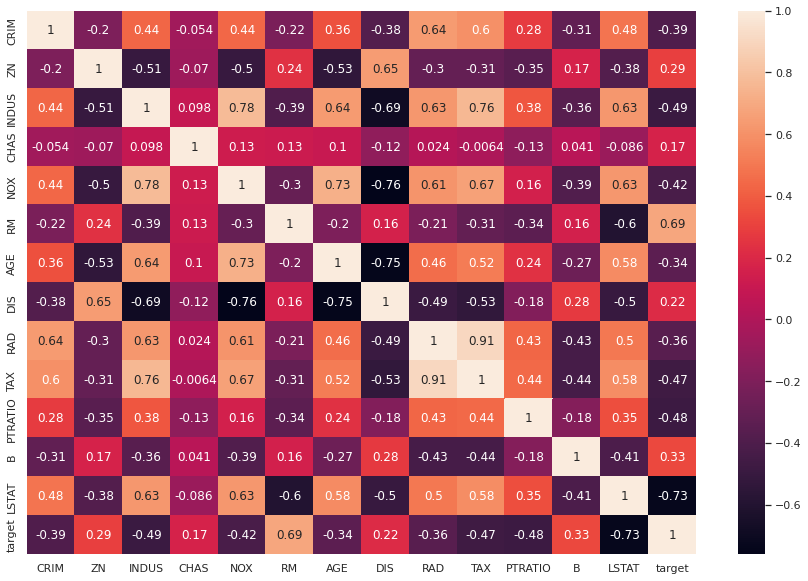

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=corr,annot=True)
plt.show()

In [28]:
selected_columns = ['CRIM','INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO','LSTAT']

In [29]:
train_selected = traindf[selected_columns]
test_selected = tdf[selected_columns]
test_selected.head()

CRIM  INDUS    NOX     RM    TAX  PTRATIO  LSTAT
0  0.05188   4.49  0.449  6.015  247.0     18.5  12.86
1  0.05780   2.46  0.488  6.980  193.0     17.8   5.04
2  0.03738   5.19  0.515  6.310  224.0     20.2   6.75
3  0.01360   4.00  0.410  5.888  469.0     21.1  14.80
4  0.41238   6.20  0.504  7.163  307.0     17.4   6.36

# 11. Conclusion

I trained and tested the model using Ridge and Lasso Regularization for Polynomial models to reduce overfitting. In addition, to reduce mistakes, the model is fitted suitably on a specified test set.